In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Downloading Data and Formatting (Make sure you have all the CSVs)

#Backtester Data for various Rank Appetite
rank = ['1.0', '1.25', '1.5', '1.75', '2.0', '2.25', '2.5', '2.75', '3.0', '3.25', '3.5', 
        '3.75', '4.0', '4.25', '4.5', '4.75', '5.0', '5.25', '5.5', '5.75', '6.0', '6.25',
       '6.5', '6.75', '7.0', '7.25', '7.5', '7.75', '8.0', '8.25', '8.5', '8.75', '9.0',
       '9.25', '9.5', '9.75']

ret = pd.DataFrame()
cumret = pd.DataFrame()

for i in rank:
    df = pd.read_csv('Master_Portfolio_Returns'+i+'.csv')
    ret[i] = df.iloc[:,1]
    cumret[i] = df.iloc[:,2]
    
    
#InvestmentGrade Return Data 
igret = pd.read_csv('IG_Index_Data_Monthly.csv')
igret['CumReturn'] = (1+igret['Returns']).cumprod()-1

igqret = pd.DataFrame() # Extract every 4th value starting from the first row
igqret = igret.iloc[::3]['CumReturn'].reset_index(drop=False)

new_row = pd.DataFrame([[0] * len(igqret.columns)], columns=igqret.columns)
igqret = pd.concat([new_row, igqret], ignore_index=True)


#HighYield Return Data
hyret = pd.read_csv('HY_Index_Data_Monthly.csv')
hyret['CumReturn'] = (1+hyret['Returns']).cumprod()-1

hyqret = pd.DataFrame() # Extract every 4th value starting from the first row
hyqret = hyret.iloc[::3]['CumReturn'].reset_index(drop=False)

new_row = pd.DataFrame([[0] * len(hyqret.columns)], columns=hyqret.columns)
hyqret = pd.concat([new_row, hyqret], ignore_index=True)


#Riskfree Data 
rf = pd.DataFrame()
rf = igret.iloc[::3]['RF'].reset_index(drop=False)

new_row = pd.DataFrame([[0] * len(rf.columns)], columns=rf.columns) #standardise shape with other dfs
rf = pd.concat([new_row, rf], ignore_index=True)

In [3]:
# Mean, Stdev, and Sharpe Calculations (All annualised)
rankmeans = ret.mean() * 4
ranksd = ret.std() * np.sqrt(4)
ranksharpe = (ret.sub(rf.RF, axis=0).mean() * 4) / (ranksd * np.sqrt(4))

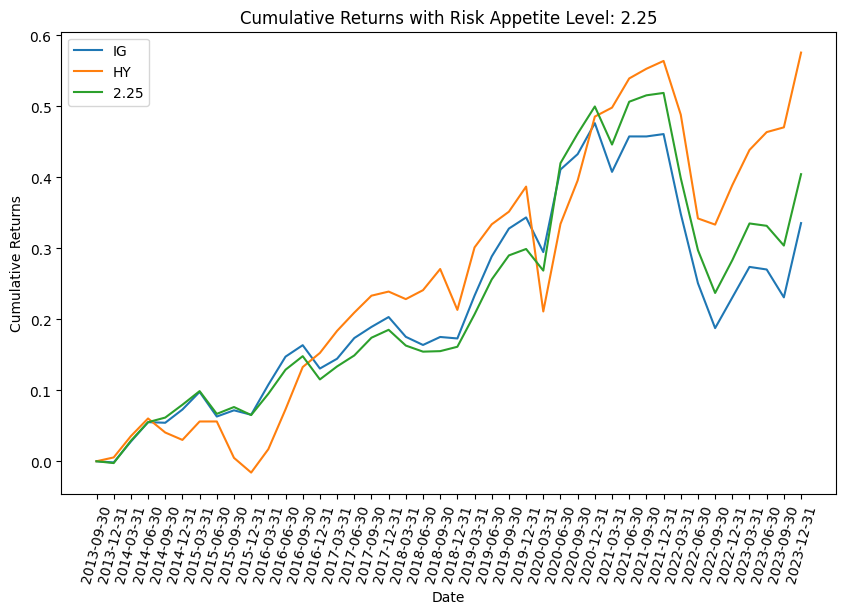

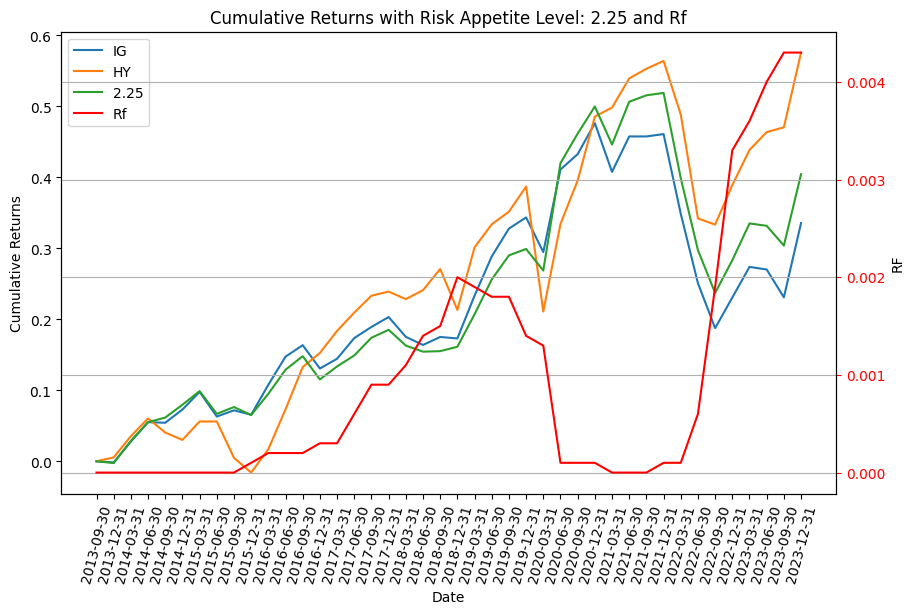

In [4]:
rankappetite_selector = '2.25'

#Graph w/o rf
plt.figure(figsize=(10, 6))

plt.plot(df.Date, igqret.CumReturn, label='IG')
plt.plot(df.Date, hyqret.CumReturn, label='HY')
plt.plot(df.Date, cumret[rankappetite_selector], label=rankappetite_selector)
plt.xticks(rotation=75)
plt.title(f'Cumulative Returns with Risk Appetite Level: {rankappetite_selector}')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()


#Graph w/ rf
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(df.Date, igqret.CumReturn, label='IG')
ax1.plot(df.Date, hyqret.CumReturn, label='HY')
ax1.plot(df.Date, cumret[rankappetite_selector], label=rankappetite_selector)

ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative Returns')
ax1.set_title(f'Cumulative Returns with Risk Appetite Level: {rankappetite_selector} and Rf')
ax1.tick_params(axis='x', rotation=75)

ax2 = ax1.twinx() # Create a second y-axis
ax2.plot(df.Date, rf.RF, color='red', label='Rf')
ax2.set_ylabel('RF')
ax2.tick_params(axis='y', colors='red')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.grid(True)
plt.show()


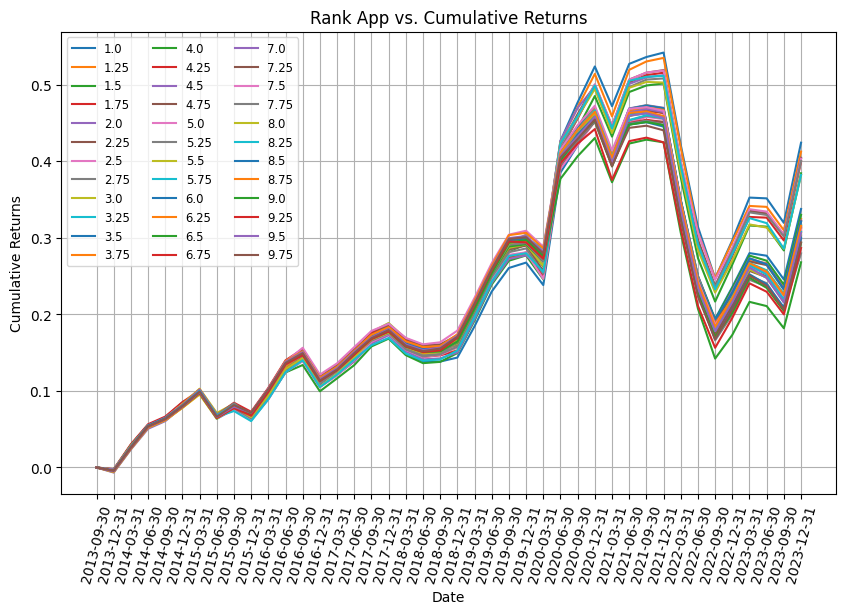

In [5]:
#Plot CumRet for all Rank Appetites
plt.figure(figsize=(10, 6))  
for col in cumret.columns:
    plt.plot(df.Date, cumret[col], label=col) 

plt.title('Rank App vs. Cumulative Returns')    
plt.legend(fontsize='small', ncol=3, loc='upper left') 
plt.xticks(rotation=75)
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.grid(True)
plt.show()  

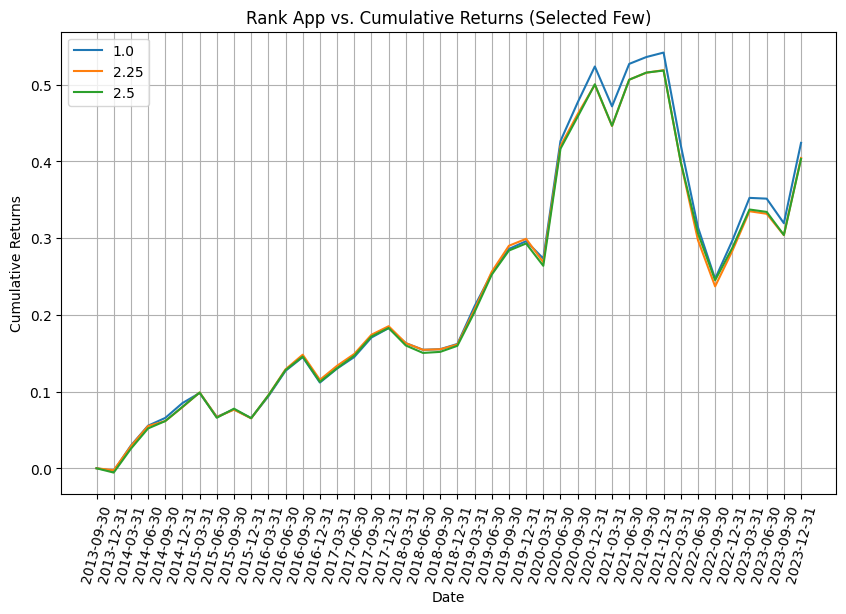

In [6]:
#Plot CumRet for Selected Few
plt.figure(figsize=(10, 6))  # Set the size of the figure
for col in [0, 5, 6]:  # Only plot columns 1, 6, and 7
    plt.plot(df.Date, cumret.iloc[:,col], label=cumret.columns[col]) 

plt.title('Rank App vs. Cumulative Returns (Selected Few)')    
plt.legend(loc='upper left') 
plt.xticks(rotation=75)
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.grid(True)
plt.show()  


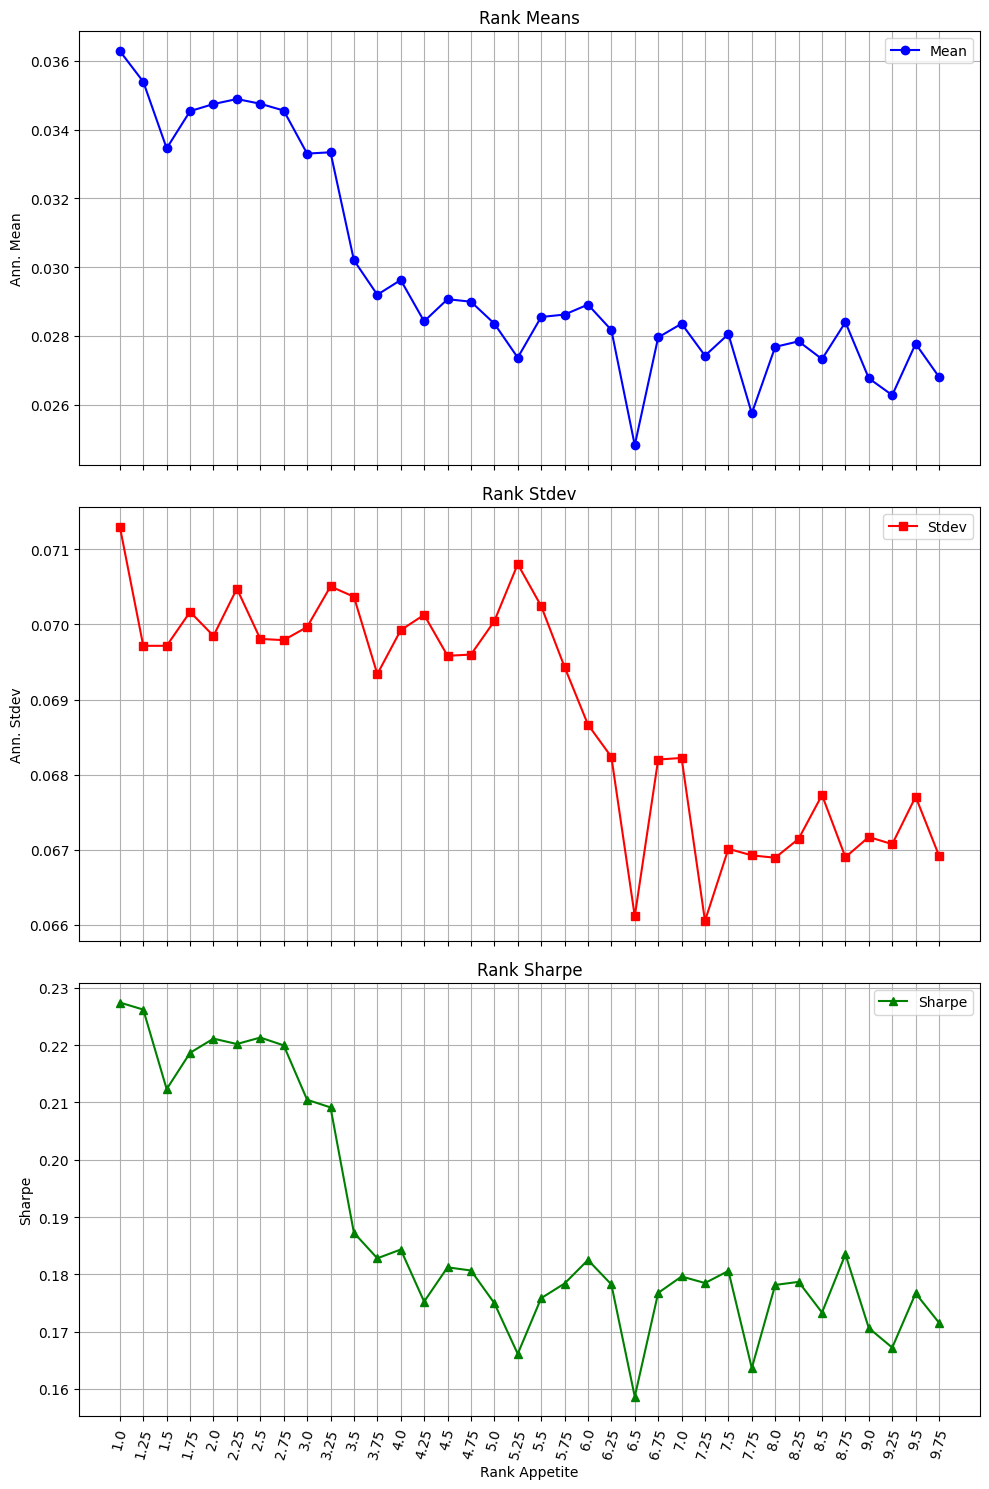

In [7]:
#Plot Mean, Stdev, and Sharpe Across various Rank Appetites
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

# Plot Rank Means
ax1.plot(rank, rankmeans, marker='o', color='b', label='Mean')
ax1.set_title('Rank Means')
ax1.set_ylabel('Ann. Mean')
ax1.grid(True)
ax1.legend()

# Plot Rank Stdev
ax2.plot(rank, ranksd, marker='s', color='r', label='Stdev')
ax2.set_title('Rank Stdev')
ax2.set_ylabel('Ann. Stdev')
ax2.grid(True)
ax2.legend()

# Plot Rank Sharpe
ax3.plot(rank, ranksharpe, marker='^', color='g', label='Sharpe')
ax3.set_title('Rank Sharpe')
ax3.set_xlabel('Rank Appetite')
plt.xticks(rotation=75)
ax3.set_ylabel('Sharpe')
ax3.grid(True)
ax3.legend()

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()
